<a href="https://colab.research.google.com/github/hermeson883/Big_Data_Work/blob/explanation_branch/Games_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from wordcloud import WordCloud, STOPWORDS

In [ ]:
games_sale = pd.read_csv('vgsales.csv')
games_sale

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


#Analise exploratoria do Dataframe

Nessa primeira parte veremos como se encontra a **saúde** do nosso DataFrame. Veremos se existe um valor faltante e iremos análisar os dados das colunas

1.   Olhando suas dimensões
2.   Olhando quantos valores nulos existem dentro do DF
3.   Dropando os valores nulos do DF
4.   Iremos olhar para os valores unicos presentes dentro da coluna de "Platform" e "Year"
5.   Olhando qunatos valores existem na coluna "Genre" e "Publisher"
6.   Realizando o somatorio de todas as colunas de vendas



In [ ]:
games_sale.shape

(16598, 11)

In [ ]:
games_sale.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

# Dropando os valores nulos

1.  Optamos por dropar os valore nulos, pois eles não simbolizam um número significante para causar uma problematica em nossa análise então optamos por deletá los.
2.  Depois vamos converter o seu dados para `int64`. pois ele está no formato `float64`

In [ ]:
games_sale.dropna(inplace=True)

In [ ]:
games_sale["Platform"].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [ ]:
games_sale["Year"].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2003., 1986., 2000., 1995., 2016., 1991., 1981., 1987., 1980.,
       1983., 2020., 2017.])

In [ ]:
games_sale["Year"] = games_sale["Year"].astype(int)
games_sale

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


### Olhando os gêneros que mais aparecem e olhando para as empresas que mais publicaram jogos 

In [ ]:
games_sale['Genre'].value_counts()

Action          3251
Sports          2304
Misc            1686
Role-Playing    1470
Shooter         1282
Adventure       1274
Racing          1225
Platform         875
Simulation       848
Fighting         836
Strategy         670
Puzzle           570
Name: Genre, dtype: int64

In [ ]:
games_sale['Publisher'].value_counts()

Electronic Arts                 1339
Activision                       966
Namco Bandai Games               928
Ubisoft                          918
Konami Digital Entertainment     823
                                ... 
Detn8 Games                        1
Pow                                1
Navarre Corp                       1
MediaQuest                         1
UIG Entertainment                  1
Name: Publisher, Length: 576, dtype: int64

In [ ]:
#Realizando o somatorio de todas as colunas de vendas
games_sale[["NA_Sales",	"EU_Sales",	"JP_Sales",	"Other_Sales",	"Global_Sales",]].sum()

NA_Sales        4327.65
EU_Sales        2406.69
JP_Sales        1284.27
Other_Sales      788.91
Global_Sales    8811.97
dtype: float64

#Realizando uma analise de dados no DataFrame

Nessa fase iremos extrair informações das colunas do DataFrame e para isso decidimos partir do macro para podermos chegar ao micro.

Na primeira parte iremos gerar uma serie de gráficos para descobrir informações como: 

1.   Qual o console que mais vendeu globalmente?

2.   Qual as 10 empresas que mais venderam jogos em todo mundo?

3.   Quais foram esses jogos? 

In [ ]:
fig = px.histogram(games_sale, x="Platform", 
             y = 'Global_Sales', 
             color="Platform")
fig.update_layout(title_text='Consoles mais vendidos em todo mundo (Em milhões)', title_x=0.5, yaxis_title="Vendas globais", xaxis_title = "Console")

In [ ]:
platform_global_sales = games_sale.groupby(['Publisher'], as_index=False)['Global_Sales'].sum()

platform_global_sales = platform_global_sales.sort_values(by = 'Global_Sales', ascending=False).head(10)

fig = px.histogram(
    x=platform_global_sales['Publisher'], 
    y = platform_global_sales['Global_Sales'], 
    title="Top 10 empresas que mais venderam jogos", 
    color = platform_global_sales["Publisher"],    
)

fig.update_layout(yaxis_title="Faturamento global", xaxis_title = "Empresas que mais venderam",  title_x=0.5)

fig.show()

#Qual o jogo mais vendido?
Em primeiro momento podemos afirmar visualmente que o console **Playstation 2** foi o que mais vendeu perante os outros...pórem, será que ele possui o jogo mais vendido?

In [ ]:
fig = px.scatter(games_sale, y="Global_Sales", x = "Rank", color='Platform', hover_data=['Name'])
fig.show()

## Para ficar mais visual vamos aumentar a circunferência pela sua importância

In [ ]:
fig = px.scatter(games_sale, y="Global_Sales", x = "Rank", color='Platform', hover_data=['Name'], size="Global_Sales", size_max=60)
fig.update_layout(xaxis_title="Rank",
                  yaxis_title="Vendas Globais")
fig.show()

# Porque o 'wii Sports' é o jogo mais vendido de todos os tempos?

O motivo para que o 'Wii Sports' seja o jogo mais vendido de todos se deve ao fato de que ele era um jogo que já vinha com o console na hora da sua compra, então esse fator acaba por inflacionar MUITO os números de um jogo de sports que é um mercado 'nichado', ou seja, destinado a um publico em específico, além da simplicidade do Wii Sports comparado a outros grandes titulos da empresa .


> Links adicionais:

**Wii sports se torna o jogo mais 'vendido' de todos os tempos**
https://www.nintendoblast.com.br/2009/05/wii-sports-se-torna-o-jogo-mais-vendido.html

**Why Wii Sports Is the Best-Selling Nintendo Game Ever**
https://www.denofgeek.com/games/wii-sports-best-selling-nintendo-game-ever-explained-retrospective/

# Nuvem de palavras
1.  Usando uma nuvem de palavras para ver qual foi a categoria de jogos que mais vendeu 

2.  Vendo os consoles que mais venderam

In [ ]:
category = games_sale["Genre"].value_counts()
category = category.to_string()

category

'Action          3251\nSports          2304\nMisc            1686\nRole-Playing    1470\nShooter         1282\nAdventure       1274\nRacing          1225\nPlatform         875\nSimulation       848\nFighting         836\nStrategy         670\nPuzzle           570'


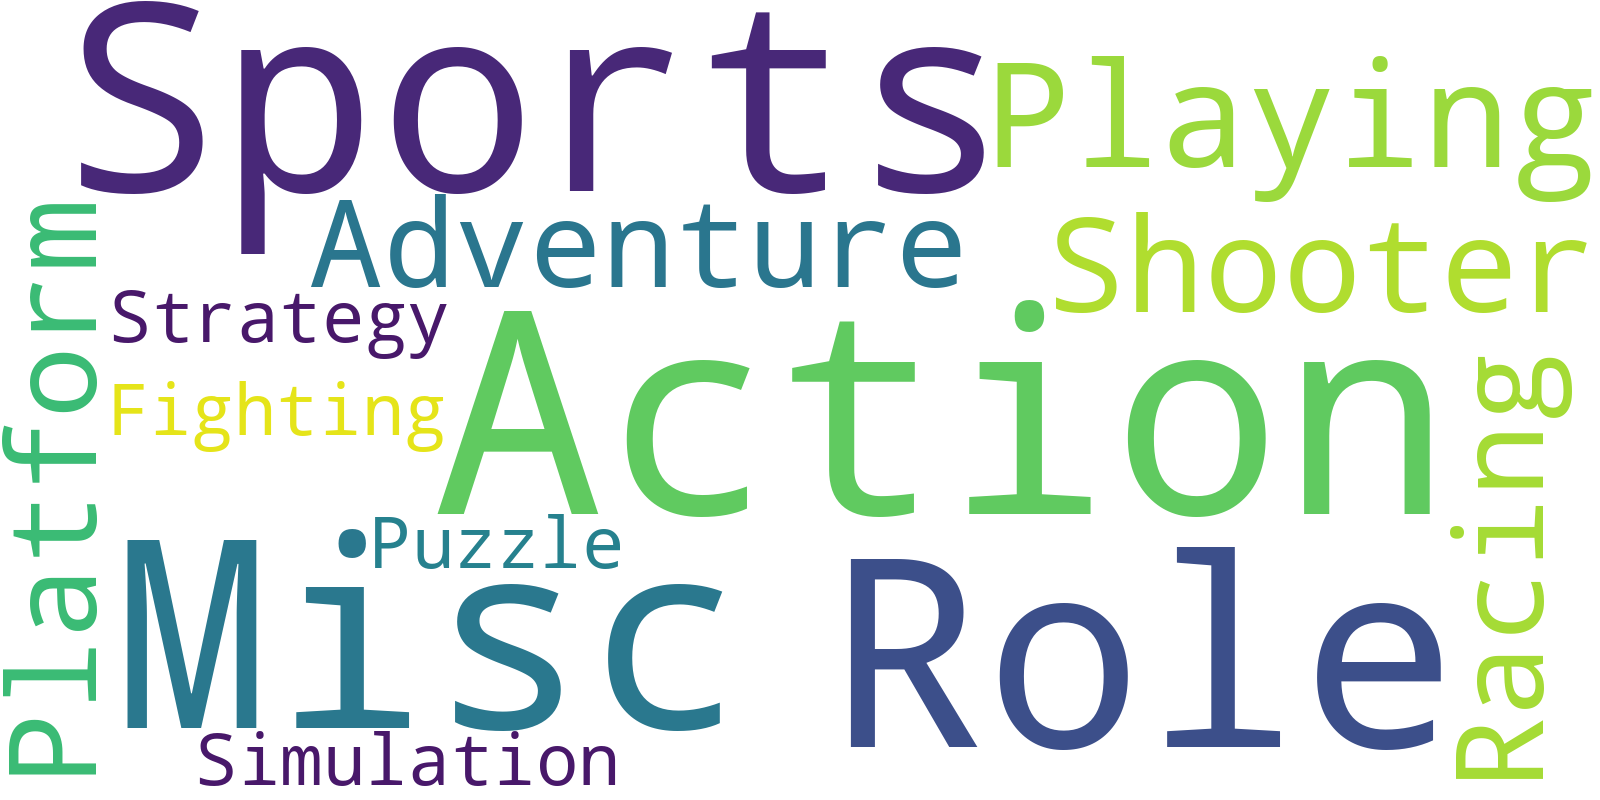

In [ ]:
wordcloud = WordCloud(
    stopwords = STOPWORDS,
    background_color="white",
    width = 1600, 
    height = 800,
).generate(category)
fig = px.imshow(wordcloud)
fig.update_layout(
    xaxis={'visible': False},
    yaxis={'visible': False}
)
fig.show()

In [ ]:
plot_genrer = games_sale.loc[(games_sale['Genre'] == "Action") |
                             (games_sale['Genre'] == "Sports") | 
                             (games_sale['Genre'] == "Shooter") | 
                             (games_sale['Genre'] == "Role-Playing") | 
                             (games_sale['Genre'] == "Racing")]

plot_genrer = plot_genrer.groupby(['Genre', 'Year'], as_index=False)['Global_Sales'].sum()

fig = px.line(plot_genrer, x = "Year", y = 'Global_Sales', color = 'Genre', title='Generos de jogos mais vendidos')

fig.update_layout(yaxis_title="Vendas globais", xaxis_title = "Vendas por ano")

In [ ]:
category = games_sale['Platform'].value_counts()
category = category.to_string()
category

'DS      2131\nPS2     2127\nPS3     1304\nWii     1290\nX360    1234\nPSP     1197\nPS      1189\nPC       938\nXB       803\nGBA      786\nGC       542\n3DS      499\nPSV      410\nPS4      336\nN64      316\nSNES     239\nXOne     213\nSAT      173\nWiiU     143\n2600     116\nNES       98\nGB        97\nDC        52\nGEN       27\nNG        12\nSCD        6\nWS         6\n3DO        3\nTG16       2\nGG         1\nPCFX       1'


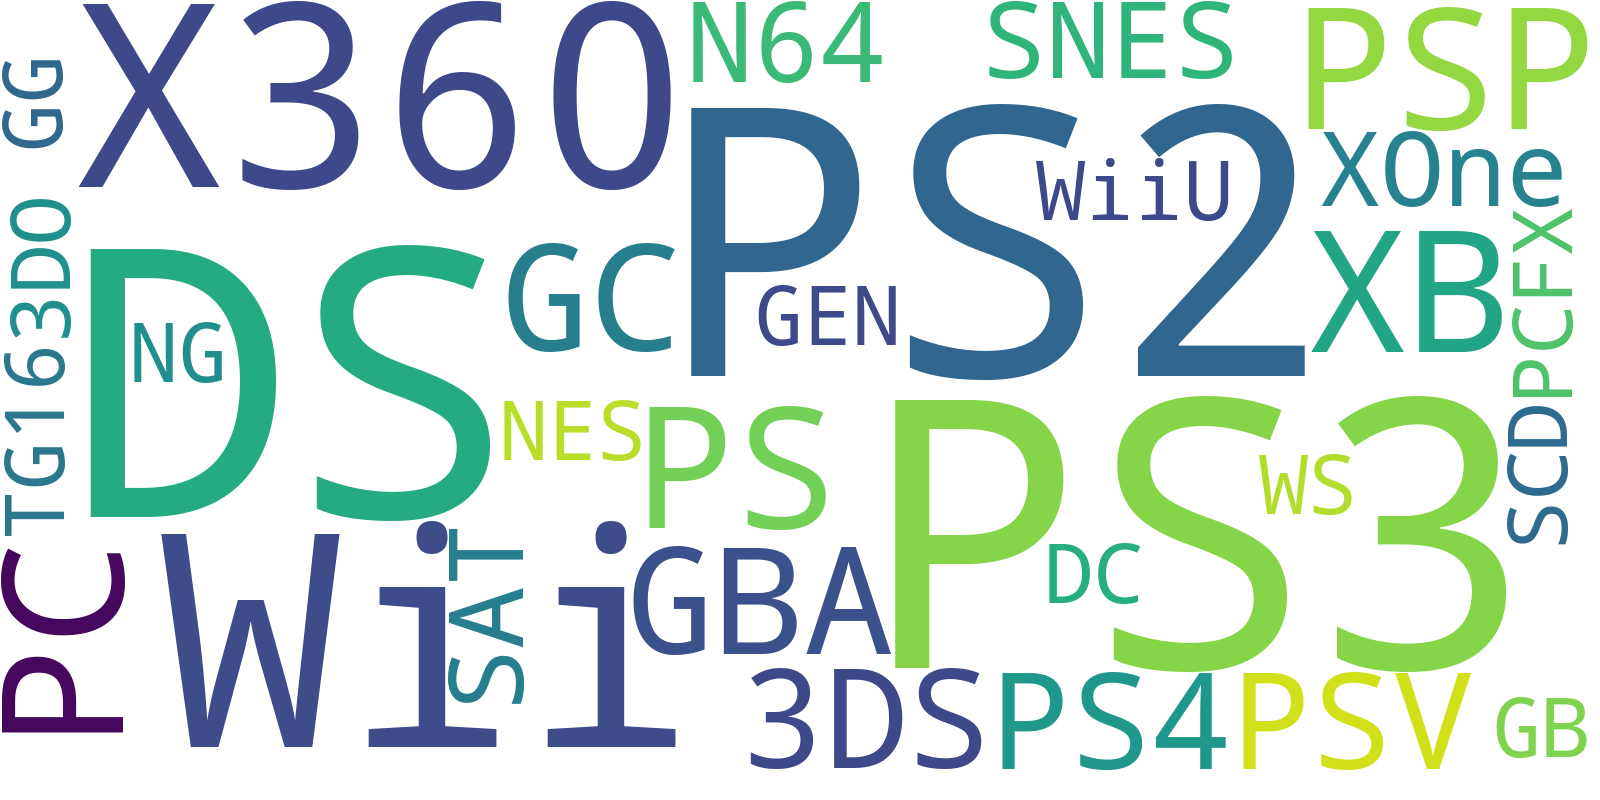

In [ ]:
wordcloud = WordCloud(
    stopwords = STOPWORDS,
    background_color="white",
    width = 1600, 
    height = 800,
    
).generate(category)
fig = px.imshow(wordcloud)
fig.update_layout(
    xaxis={'visible': False},
    yaxis={'visible': False}
)
fig.show()

In [ ]:
plot_genrer = games_sale.loc[(games_sale['Platform'] == "PS2") |
                             (games_sale['Platform'] == "PS3") | 
                             (games_sale['Platform'] == "DS") | 
                             (games_sale['Platform'] == "Wii") | 
                             (games_sale['Platform'] == "XBOX360")]
plot_genrer = games_sale
plot_genrer = plot_genrer.groupby(['Platform', 'Year'], as_index=False)['Global_Sales'].sum()

px.line(plot_genrer, x = "Year", y = 'Global_Sales', color = 'Platform')

#Em qual plataforma mais jogos foram vendidos?


In [ ]:
publisher_group = games_sale.groupby(["Platform"], as_index= False)['Global_Sales'].sum()

publisher_group = publisher_group.sort_values(by=["Global_Sales"], ascending = False).head()

fig = px.bar(x = publisher_group['Platform'], y = publisher_group["Global_Sales"], color=publisher_group['Platform'])

fig.update_layout(yaxis_title="Vendas globais", xaxis_title = "Vendas por ano")

In [ ]:
plot_genrer = games_sale.loc[(games_sale['Platform'] == "PS2") |
                             (games_sale['Platform'] == "PS3") | 
                             (games_sale['Platform'] == "DS") | 
                             (games_sale['Platform'] == "Wii") | 
                             (games_sale['Platform'] == "X360") |
                              (games_sale['Platform'] == "XB")]

# Droping the anomaly "Strongest Tokyo University Shogi DS" with was released in 1985
plot_genrer = plot_genrer.drop(plot_genrer[plot_genrer['Name'] == 'Strongest Tokyo University Shogi DS'].index)

plot_genrer = plot_genrer.groupby(['Platform', 'Year'], as_index=False)['Global_Sales'].sum()

fig = px.line(plot_genrer, x = "Year", y = 'Global_Sales', color = 'Platform')

fig.update_layout(yaxis_title="Vendas globais", xaxis_title = "Console", title = 'Vendas dos consoles mais vendidos atráves dos anos')

In [ ]:
publisher_group

,Platform,Global_Sales
16,PS2,1233.46
28,X360,969.60
17,PS3,949.35
26,Wii,909.81
4,DS,818.91


#Separando as maiores rivalidades do mundo dos games

Nessa Parte passaremos a fazer a classificação da nossa análise baseado nas maiores rivalidades dos video-games.

Nosso objetivo com isso é perceber como decorreu a evolução do mercado dos video-games e notar as mudanças que ocorreram dentre as gigantes do mercado, além de notar qual console se saiu melhor em questão de vendas, regiões com performances melhores e etc.

Essa análise irá contemplar os seguintes consoles: 


1.   Super Nintendo vs Mega drive
3.   N64 vs PS1
4.   PS2 vs Xbox
5.   PS3 VS Xbox360
6.   PS4 VS Xbox One



# SNES VS Mega Drive

In [ ]:
snes_gen = games_sale.loc[(games_sale['Platform'] == 'SNES') | (games_sale['Platform'] == 'GEN')] 
snes_gen

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
18,19,Super Mario World,SNES,1990,Platform,Nintendo,12.78,3.75,3.54,0.55,20.61
57,58,Super Mario All-Stars,SNES,1993,Platform,Nintendo,5.99,2.15,2.12,0.29,10.55
71,72,Donkey Kong Country,SNES,1994,Platform,Nintendo,4.36,1.71,3.00,0.23,9.30
76,77,Super Mario Kart,SNES,1992,Racing,Nintendo,3.54,1.24,3.81,0.18,8.76
136,137,Street Fighter II: The World Warrior,SNES,1992,Fighting,Capcom,2.47,0.83,2.87,0.12,6.30
...,...,...,...,...,...,...,...,...,...,...,...
14898,14901,The Great Battle Gaiden 2: Matsuri da Wasshoi,SNES,1994,Action,Banpresto,0.00,0.00,0.03,0.00,0.03
15168,15171,Super Nazo Puyo Tsuu: Ruruu no Tetsuwan Hanjyouki,SNES,1996,Puzzle,Compile,0.00,0.00,0.02,0.00,0.02
15255,15258,Sugoi Hebereke,SNES,1994,Fighting,Sunsoft,0.00,0.00,0.02,0.00,0.02
15687,15690,World Class Rugby 2: Kokunai Gekitou Hen '93,SNES,1994,Sports,Misawa,0.00,0.00,0.02,0.00,0.02


### 10 Maiores vendas globais de ambos consoles

In [ ]:
snes_grouped = games_sale.loc[(games_sale['Platform'] == 'SNES')].head(10)
gen_grouped = games_sale.loc[(games_sale['Platform'] == 'GEN')].head(10)
snes_gen_concat = pd.concat([snes_grouped, gen_grouped])
fig = px.bar(snes_gen_concat, x = 'Platform',y = 'Global_Sales', color ='Name', title = 'Top 10 maiores jogos da nintendo e Sega')
fig.update_layout(yaxis_title="Vendas globais", xaxis_title = "Console")

In [ ]:
grouped_snes_gen = snes_gen.groupby(['Platform', 'Year'], as_index=False)[['JP_Sales', 'NA_Sales', 'EU_Sales', 'Other_Sales', 'Global_Sales']].sum()

fig = px.line(grouped_snes_gen, x = 'Year', y = 'Global_Sales', color = 'Platform', markers = True, )

fig.update_layout(xaxis_title="Anos", yaxis_title="Games mais vendidos", title_x=0.5)

In [ ]:
fig = make_subplots(rows=2, cols=2, subplot_titles=("Vendas nos EU", "Vendas no JP", "Vendas na NA", "Vendas em outros lugares"))

fig.append_trace(go.Histogram(
    x=grouped_snes_gen['Platform'],
    y= grouped_snes_gen['EU_Sales'],
), row=1, col=1)


fig.append_trace(go.Histogram(
    x=grouped_snes_gen['Platform'],
    y= grouped_snes_gen['JP_Sales'],

), row=1, col=2)

fig.append_trace(go.Histogram(
    x=grouped_snes_gen['Platform'],
    y= grouped_snes_gen['NA_Sales'],
), row=2, col=1)

fig.append_trace(go.Histogram(
    x=grouped_snes_gen['Platform'],
    y= grouped_snes_gen['Other_Sales'],
), row=2, col=2)


fig.update_layout(title_text = 'Comparativo de vendas nintendo e sony em varios lugares de do globo (escala de milhões)', height=900, width=900)

fig.show()

## Porque o Super nintendo vendeu mais que o Mega_drive(Genesis)

O

# N64 VS PS1


In [ ]:
# sales_ps1_grouped = ps1.groupby(['Year'], as_index=False)['Global_Sales'].sum()
# sales_ps1_grouped

In [ ]:
ps1_n64 = games_sale.loc[(games_sale['Platform'] == 'N64') | (games_sale['Platform'] == "PS")]
ps1_n64

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
46,47,Super Mario 64,N64,1996,Platform,Nintendo,6.91,2.85,1.91,0.23,11.89
52,53,Gran Turismo,PS,1997,Racing,Sony Computer Entertainment,4.02,3.87,2.54,0.52,10.95
63,64,Mario Kart 64,N64,1996,Racing,Nintendo,5.55,1.94,2.23,0.15,9.87
66,67,Final Fantasy VII,PS,1997,Role-Playing,Sony Computer Entertainment,3.01,2.47,3.28,0.96,9.72
69,70,Gran Turismo 2,PS,1999,Racing,Sony Computer Entertainment,3.88,3.42,1.69,0.50,9.49
...,...,...,...,...,...,...,...,...,...,...,...
16506,16509,Samurai Shodown: Warrios Rage,PS,1999,Fighting,SNK,0.01,0.00,0.00,0.00,0.01
16518,16521,Crossroad Crisis,PS,2000,Puzzle,Success,0.01,0.00,0.00,0.00,0.01
16554,16557,Psychic Detective,PS,1995,Adventure,Electronic Arts,0.01,0.00,0.00,0.00,0.01
16579,16582,PGA European Tour,N64,2000,Sports,Infogrames,0.01,0.00,0.00,0.00,0.01


In [ ]:
sales = ps1_n64.groupby(['Platform'], as_index=False)[['JP_Sales', 'NA_Sales', 'EU_Sales', 'Other_Sales']].sum()
sales

fig = make_subplots(rows=2, cols=2, subplot_titles=("Vendas nos EU", "Vendas no JP", "Vendas na NA", "Vendas em outros lugares"))

fig.append_trace(go.Bar(
    x=sales['Platform'],
    y= sales['EU_Sales'],
), row=1, col=1)


fig.append_trace(go.Bar(
    x=sales['Platform'],
    y= sales['JP_Sales'],

), row=1, col=2)

fig.append_trace(go.Bar(
    x=sales['Platform'],
    y= sales['NA_Sales'],
), row=2, col=1)

fig.append_trace(go.Bar(
    x=sales['Platform'],
    y= sales['Other_Sales'],
), row=2, col=2)


fig.update_layout(title_text = 'Comparativo de vendas nintendo e sony em varios lugares de do globo', height=900, width=900)

fig.show()

In [ ]:
most_sale_game = ps1_n64.groupby(['Platform', 'Name'], as_index=False)[['Global_Sales']].max()
most_sale_game

,Platform,Name,Global_Sales
0,N64,007: The World is not Enough,1.55
1,N64,1080°: TenEighty Snowboarding,2.03
2,N64,64 de Hakken! Tamagotchi Minna de Tamagotchi W...,0.22
3,N64,A Bug's Life,0.63
4,N64,Aero Gauge,0.07
...,...,...,...
1500,PS,Yu-Gi-Oh! Monster Capsule Breed & Battle,0.28
1501,PS,Zen-Nippon Pro Wrestling: Ouja no Kon,0.12
1502,PS,Zero Divide,0.06
1503,PS,Zoboomafoo: Leapin' Lemurs!,0.03


In [ ]:
n_64 = ps1_n64.loc[ps1_n64['Platform'] == 'N64']
ps1 = ps1_n64.loc[ps1_n64['Platform'] == 'PS']

In [ ]:
n_64 = n_64.loc[n_64['Global_Sales'] == n_64['Global_Sales'].max()]
ps1 = ps1.loc[ps1_n64['Global_Sales'] == ps1['Global_Sales'].max()]

In [ ]:
ps1

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
52,53,Gran Turismo,PS,1997,Racing,Sony Computer Entertainment,4.02,3.87,2.54,0.52,10.95


In [ ]:
n_64

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
46,47,Super Mario 64,N64,1996,Platform,Nintendo,6.91,2.85,1.91,0.23,11.89


# Comparando o jogo que mais vendeu em cada plataforma

In [ ]:
ps1_n64_concat = pd.concat([ps1, n_64])
fig = px.pie(ps1_n64_concat, values='Global_Sales', names= 'Name',color = 'Name', title = 'Jogos mais vendidos de cada console', color_discrete_map={
    'Super Mario 64':'#fe0016 ',
    'Gran Turismo':'#0070D1',
})
fig.update_traces(textposition='inside', textinfo='percent+label')

## Porque o Super Mario 64 vendeu mais que o Gran Turismo sendo que o Playstation foi muito mais rentável em várias partes do mundo?

### **Um fenomeno chamado 'Super Mario'**

É inegavel que hoje em dia todos conhecem o personagem que usa uma roupa de encanador e chapeu vermelho na cabeça e considerando ainda que o maior mascote da nintendo já acumulava na época mais de uma década no mercado, além de ter varios jogos lançados desde o 'NES' não é a toa que ele tenha conseguido alcançar o público que comprou o console da época, mais do que uma franquia que estava acabando de sugir.

Como exemplo abaixo terá as vendas globais do super Mario.

# Vendas globais dos jogos do Mário

In [ ]:
mario = games_sale.loc[games_sale['Publisher'] == 'Nintendo']
mario = mario.query('Name.str.contains("Mario")')
mario = mario.groupby(['Platform'], as_index=False)['Global_Sales'].sum()
mario = mario.sort_values(by = 'Global_Sales')
fig = px.histogram(mario, x= 'Platform', y = 'Global_Sales', color = 'Platform')

fig.update_layout(xaxis_title="Anos", yaxis_title="Soma global de vendas")

In [ ]:
nitendo_games = games_sale.loc[(games_sale['Publisher'] == 'Nintendo') & (games_sale['Genre'] == 'Platform')]
mario = nitendo_games.query('Name.str.contains("Mario")')
px.scatter(mario, x = 'Year', y= 'Global_Sales', hover_data=['Platform'], color = 'Name', size='Global_Sales', size_max=40 )

# PS3 VS XBOX 360

In [ ]:
ps2_xbox360 = games_sale.loc[(games_sale['Platform'] == 'XB') | (games_sale['Platform'] == 'PS2')]
ps2_xbox360

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
17,18,Grand Theft Auto: San Andreas,PS2,2004,Action,Take-Two Interactive,9.43,0.40,0.41,10.57,20.81
24,25,Grand Theft Auto: Vice City,PS2,2002,Action,Take-Two Interactive,8.41,5.49,0.47,1.78,16.15
28,29,Gran Turismo 3: A-Spec,PS2,2001,Racing,Sony Computer Entertainment,6.85,5.09,1.87,1.16,14.98
38,39,Grand Theft Auto III,PS2,2001,Action,Take-Two Interactive,6.99,4.51,0.30,1.30,13.10
47,48,Gran Turismo 4,PS2,2004,Racing,Sony Computer Entertainment,3.01,0.01,1.10,7.53,11.66
...,...,...,...,...,...,...,...,...,...,...,...
16559,16562,Sugar + Spice! Anoko no Suteki na Nanimokamo,PS2,2008,Adventure,Alchemist,0.00,0.00,0.01,0.00,0.01
16561,16564,Kanokon: Esuii,PS2,2008,Adventure,5pb,0.00,0.00,0.01,0.00,0.01
16572,16575,Scarlett: Nichijou no Kyoukaisen,PS2,2008,Adventure,Kadokawa Shoten,0.00,0.00,0.01,0.00,0.01
16580,16583,Real Rode,PS2,2008,Adventure,Kadokawa Shoten,0.00,0.00,0.01,0.00,0.01


In [ ]:
ps2=ps2_xbox360.loc[ps2_xbox360['Platform'] == 'PS2']
xb = ps2_xbox360.loc[ps2_xbox360['Platform'] == 'XB']
xb

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
79,80,Halo 2,XB,2004,Shooter,Microsoft Game Studios,6.82,1.53,0.05,0.08,8.49
129,130,Halo: Combat Evolved,XB,2001,Shooter,Microsoft Game Studios,4.98,1.30,0.08,0.07,6.43
464,465,Tom Clancy's Splinter Cell,XB,2002,Action,Ubisoft,1.85,1.04,0.00,0.13,3.02
507,508,The Elder Scrolls III: Morrowind,XB,2002,Role-Playing,Ubisoft,2.09,0.63,0.03,0.11,2.86
568,569,Fable,XB,2004,Role-Playing,Microsoft Game Studios,1.99,0.58,0.00,0.09,2.66
...,...,...,...,...,...,...,...,...,...,...,...
16359,16362,NHL 2K7,XB,2006,Sports,Take-Two Interactive,0.01,0.00,0.00,0.00,0.01
16362,16365,Powerdrome,XB,2004,Racing,Evolved Games,0.01,0.00,0.00,0.00,0.01
16372,16375,"Crouching Tiger, Hidden Dragon",XB,2003,Action,Ubisoft,0.01,0.00,0.00,0.00,0.01
16376,16379,Super Bubble Pop,XB,2002,Puzzle,Jaleco,0.01,0.00,0.00,0.00,0.01


In [ ]:
fig = px.histogram(ps2.head(10), x = 'Global_Sales', y = 'Name', orientation='h', color='Name', title='Top 10 jogos mais vendidos do ps2')
fig.update_layout(bargap=0.5, 
                  xaxis_title="Nome dos jogos",
                  yaxis_title="Vendas Globais",)
fig.show()

In [ ]:
xb['Name'].loc[xb['Name'] == 'Rockstar Games Double Pack: Grand Theft Auto III & Grand Theft Auto Vice City'] = 'Grand Theft Auto III & Vice City'

<ipython-input-43-37e677e89d08>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
fig = px.histogram(xb.head(10), y = 'Name', x = 'Global_Sales', orientation='h', color='Name', title='Top 10 jogos mais vendidos do Xbox')


fig.update_layout(bargap=0.5, 
                  xaxis_title="Nome dos jogos",
                  yaxis_title="Vendas Globais",)

fig.show()

In [ ]:
fig = px.pie(ps2_xbox360, names = 'Platform', values='Global_Sales', title='Comparativo de vendas de Xbox e Ps2', color = 'Platform', color_discrete_map= {
    'PS2': '#003791	',
    'XB' : '#107C10'
})

fig.update_traces(textposition='inside', textinfo='percent+label')

In [ ]:
max_ps2 = ps2.loc[ps2['Global_Sales'] == ps2['Global_Sales'].max()]

max_xb = xb.loc[xb['Global_Sales'] == xb['Global_Sales'].max()]

df_max_sale_ps2_xb = pd.concat([max_ps2, max_xb])

df_max_sale_ps2_xb['Name'].loc[df_max_sale_ps2_xb['Name'] == 'Grand Theft Auto: San Andreas'] = 'GTA San Andreas'

df_max_sale_ps2_xb

<ipython-input-46-c8fb71f08df8>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
17,18,GTA San Andreas,PS2,2004,Action,Take-Two Interactive,9.43,0.40,0.41,10.57,20.81
79,80,Halo 2,XB,2004,Shooter,Microsoft Game Studios,6.82,1.53,0.05,0.08,8.49


In [ ]:
fig = px.pie(df_max_sale_ps2_xb, values='Global_Sales', names='Name', title='Comparativo de vendas de Xbox e Ps2', color = 'Platform', color_discrete_map= {
    'PS2': '#003791',
    'XB' : '#107C10'
})

fig.update_traces(textposition='inside', textinfo='percent+label')

# PS3 e XBOX 360

In [ ]:
ps3_xb360 = games_sale.loc[(games_sale["Platform"] == "PS3") | (games_sale["Platform"] == "X360")]
ps3_x360_exclusive = ps3_xb360.loc[(ps3_xb360["Publisher"] == "Sony Computer Entertainment") | (ps3_xb360["Publisher"] == "Microsoft Game Studios")]
ps3_x360_exclusive = ps3_x360_exclusive.loc[ps3_x360_exclusive['Name'] != "Minecraft"]

xbox_top_10 = ps3_x360_exclusive.loc[ps3_x360_exclusive['Platform'] == 'X360'].head(10)
ps3_top_10 =  ps3_x360_exclusive.loc[ps3_x360_exclusive['Platform'] == 'PS3'].head(10)

ps3_x360_top_10 = pd.concat([ps3_top_10, xbox_top_10])

fig = px.histogram(ps3_x360_top_10, x = "Platform", y = "Global_Sales", color = "Name")
fig.update_layout(xaxis_title="Consoles mais vendidos", yaxis_title="Vendas globais")

In [ ]:
grouped_ps3_xbox = ps3_x360_exclusive.groupby(['Platform', 'Year'], as_index=False)['Global_Sales'].sum()

fig = px.line(grouped_ps3_xbox, x = 'Year', y = 'Global_Sales', color = 'Platform', markers = True, 
              title = 'Comparação das maiores vendas de exclusivos do PS3 e Xbox 360 ao longo dos anos', 
              color_discrete_map={
                    'PS3': '#003791',
                    'X360': '#107C10'
              })

fig.update_layout(xaxis_title="Anos", yaxis_title="Games mais vendidos")

In [ ]:
ps3_games = games_sale.loc[games_sale['Platform'] == 'PS3']
ps3_games = ps3_games.sort_values(by = 'Global_Sales', ascending = False)
fig = px.histogram(ps3_games.head(10), x = 'Global_Sales', y = 'Name', orientation='h', color ='Name', title ="Jogos que mais venderam no ps3", 
                   color_discrete_sequence=px.colors.sequential.Blues)
fig.update_layout(xaxis_title="Anos", yaxis_title="Games mais vendidos")
fig.show()

In [ ]:
xbox_games = games_sale.loc[(games_sale['Platform'] == 'X360')]
xbox_games = xbox_games.sort_values(by = 'Global_Sales', ascending = False)
fig = px.histogram(xbox_games.head(10), x = 'Global_Sales', y = 'Name', hover_data=['Publisher'], orientation='h', color ='Name', title ="Jogos que mais venderam no Xbox 360", 
                   color_discrete_sequence=px.colors.sequential.Greens_r)
fig.update_layout( xaxis_title="Vendas", yaxis_title="Jogos mais vendidos")
fig.show()

In [ ]:
max_sale_ps3 = ps3_games.loc[ps3_games['Global_Sales'] == ps3_games['Global_Sales'].max()]
max_sale_X360 = xbox_games.loc[xbox_games['Global_Sales'] ==  xbox_games['Global_Sales'].max()]
ps3_x360_concat = pd.concat([max_sale_ps3, max_sale_X360])

fig = px.pie(ps3_x360_concat, values = 'Global_Sales', names = 'Name', title='O jogo mais vendido do PS3 e Xbox360', 
             color = 'Platform', 
             color_discrete_map= {
            'PS3': '#003791',
            'XB' : '#107C10'})

fig.update_traces(textposition='inside', textinfo='percent+label')

## Xbox 360 > Playstation 3

Como podemo

In [ ]:
nintendo_most_sale_game = games_sale.loc[(games_sale['Global_Sales'] == games_sale['Global_Sales'].max()) & (games_sale['Publisher'] == 'Nintendo')]
nintendo_most_sale_game

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74


In [ ]:
sony_most_sale_game = games_sale.query('Publisher.str.contains("Sony")')
sony_most_sale_game = sony_most_sale_game.loc[sony_most_sale_game['Global_Sales'] == sony_most_sale_game['Global_Sales'].max()]
sony_most_sale_game

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
28,29,Gran Turismo 3: A-Spec,PS2,2001,Racing,Sony Computer Entertainment,6.85,5.09,1.87,1.16,14.98


In [ ]:
xbox_most_sale_game = games_sale.query('Publisher.str.contains("Microsoft")')
xbox_most_sale_game = xbox_most_sale_game.loc[xbox_most_sale_game['Global_Sales'] == xbox_most_sale_game['Global_Sales'].max()]
xbox_most_sale_game['Publisher'] = 'Microsoft Studios'
xbox_most_sale_game

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
15,16,Kinect Adventures!,X360,2010,Misc,Microsoft Studios,14.97,4.94,0.24,1.67,21.82


In [ ]:
sale = pd.concat([sony_most_sale_game, xbox_most_sale_game, nintendo_most_sale_game])
sale
fig = px.histogram(sale, x = 'Platform', y='Global_Sales', color = 'Name')
fig.update_layout(xaxis_title="Vendas", yaxis_title="Jogos mais vendidos", title = 'Jogo mais vendido de cada console')
fig.show()